### Types of Model Fit
* Underfitting: model has a high bias if it makes a lot of mistakes on the training data
* Ovderfitting: Model has a high variance if it predicts very well on the training data but performs poorly on the test data
   * Basically, overfitting means that the model has memorized the training data and can’t generalize to things it hasn’t seen
* Good Fit: Model has a low variance if it generalizes well on the test data

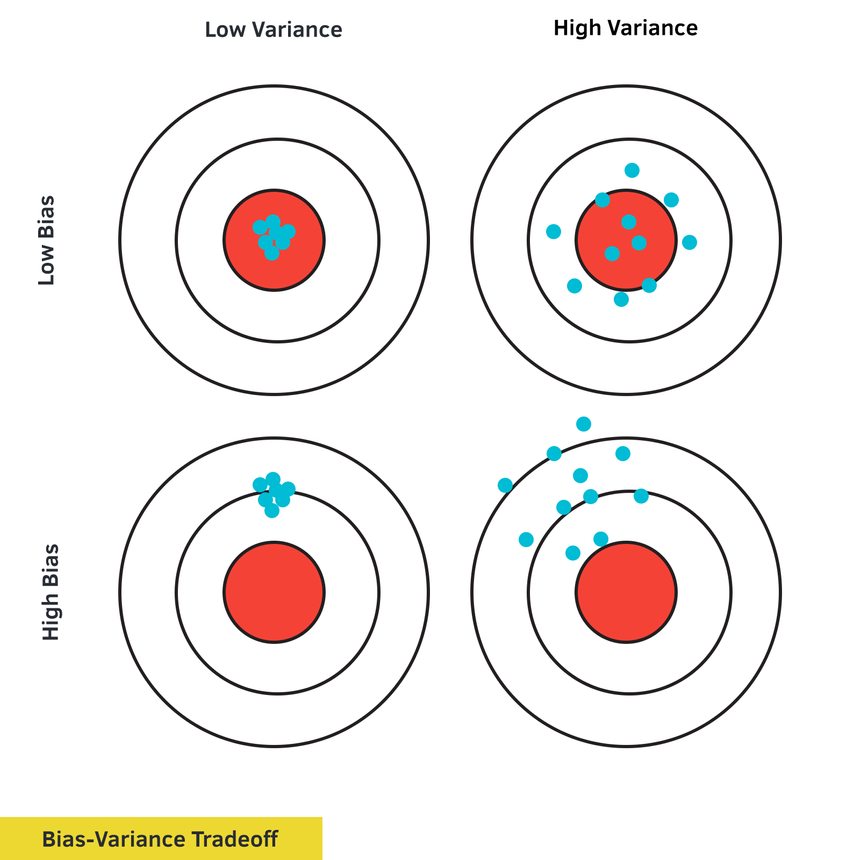

In [29]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from matplotlib import rc
from pylab import rcParams


rcParams['figure.figsize'] = 10, 6

X = np.linspace(-3, 5, 100)

np.random.shuffle(X)
X = np.sort(X[:30])
noise = [(-3 + np.random.random()*5) for i in range(len(X))]
y = X * X + noise

X = np.expand_dims(X, axis=1)

x_plot = np.linspace(-3, 5, 100)
y_test = np.expand_dims(x_plot, axis=1)

colors = ['tomato', 'royalblue', 'goldenrod']
lw = 3

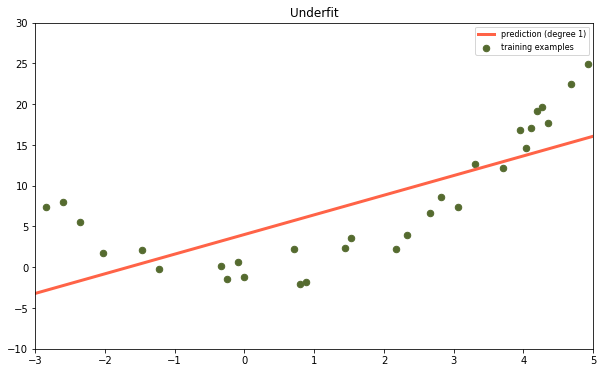

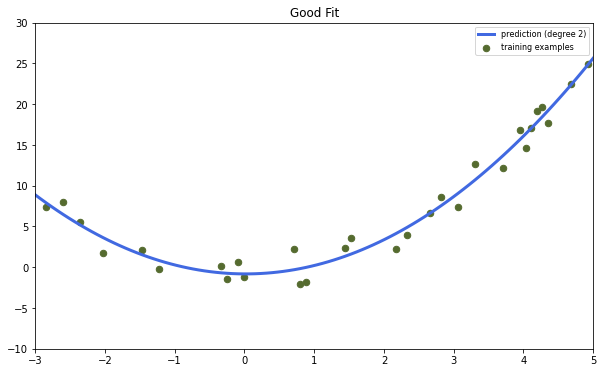

/home/sonal/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.21833e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


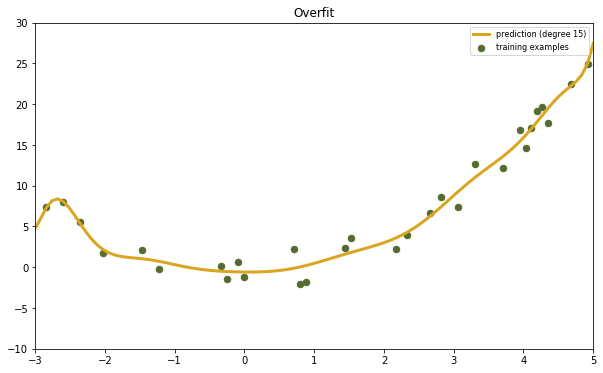

In [30]:
fit = ["Underfit", "Good Fit", "Overfit"]
for count, degree in enumerate([1, 2, 15]):
    plt.xlim([-3, 5])
    plt.ylim([-10, 30])
    plt.scatter(X, y, color='darkolivegreen', s=42, marker='o', label="training examples")
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X, y)
    y_pred = model.predict(y_test)
    plt.plot(x_plot, y_pred, color=colors[count], linewidth=lw,
             label=f'prediction (degree {degree})')
    plt.legend(loc='upper right', prop={'size': 8})
    plt.title(fit[count])
    plt.show()

### Fixing Underfitting and Overfitting Models
* How to diagnose and fix problems when:
   * Data has no predictive power
   * Model is too simple to make good predictions
   * Data brings the Curse of dimensionality
   * Model is too complex